**Support vector machines(SVMs)** are a set of supervised learning methods used for classification regression and outliers detection.

**The advantages of support vector machines are:** 

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decistion function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

**The disadvantages of support vector machines include:**

- If the number of features is much greater than the nubmer of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities)

# CLASSIFICATION

**SVC**, **NuSVC** and **LinearSVC** are classes capable of performing binary and multi-class classification on a dataset.

SVC and NuSVC are similar methods, but accept slightly differenct sets of parameters and have differenct mathematical formulations. On the other hand, LinearSVC is another(faster) implementation of Support Vector Classification for the case of a linear kernel. Note that LinearSVC does not accept parameter kernel, as this assumed to be linear. It also lacks some of the atrributes of SVC and NuSVC, like support_. 

As other classifiers, SVC, NuSVC and linearSVC take as input two arrays: an array X of shape (n_samples, n_features) holding the training samples, and an array y of class labels (strings or integers), of shape (n_samples).

In [1]:
from sklearn import svm
x = [[0,0], [1,1]]
y = [0,1]
clf = svm.SVC()
clf.fit(x,y)

SVC()

In [2]:
#After being fitted, the model can then be used to predict new values:
clf.predict([[2.,2.]])

array([1])

SVMs decision function (detailed in the Mathematical formulation) depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes support_vectors_, support_ and n_support_:

In [3]:
#get support vectors
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [4]:
#get indices of support vectors
clf.support_

array([0, 1])

In [5]:
#get number of support vectors for each class
clf.n_support_

array([1, 1])

## SVM: Maximum margin separating hyperplane
Plot the maximum margin separating hyperplane within a two-class separable dataset using a Support Vector Machine classifier with linear kernel.

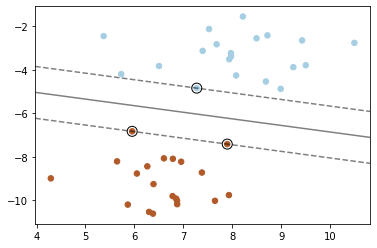

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

#we create 40 separable points
X, y = make_blobs(n_samples = 40, centers = 2, random_state = 6)

#fit the model, don't regularize for illutration purposes
clf = svm.SVC(kernel = 'linear', C = 1000)
clf.fit(X, y)

plt.scatter(X[:,0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)

#plot the decistion function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Non-linear SVM
Perform binary classification using non-linear SVC with RBF kernel. The target to predict is a XOR of the inputs.
The color map illustrates the decision function learned by the SVC.

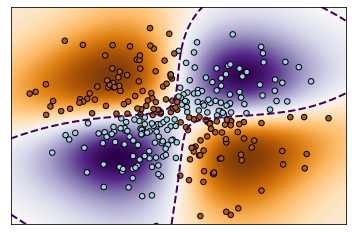

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300,2)
Y = np.logical_xor(X[:,0] > 0, X[:, 1] > 0)

#fit the model
clf = svm.NuSVC(gamma='auto')
clf.fit(X,Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

## SVM-Anova: SVM with univariate feature selection
This example shows how to perform univariate feature selection before running a SVC (support vector classifier) to improve the classification scores. We use the iris dataset (4 features) and add 36 non-informative features. We can find that our model achieves best performance when we select around 10% of features.

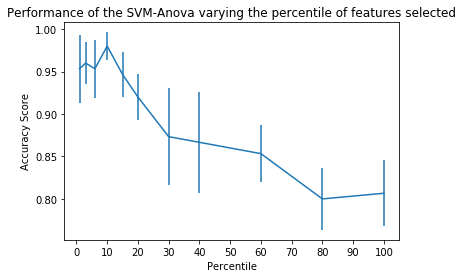

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# #############################################################################
# Import some data to play with
X, y = load_iris(return_X_y=True)
# Add non-informative features
np.random.seed(0)
X = np.hstack((X, 2 * np.random.random((X.shape[0], 36))))

# #############################################################################
# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have an full-blown estimator
clf = Pipeline([('anova', SelectPercentile(chi2)),
                ('scaler', StandardScaler()),
                ('svc', SVC(gamma="auto"))])

# #############################################################################
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('Accuracy Score')
plt.axis('tight')
plt.show()

## Multi-class classification
**SVC and NuSVC** implement the "one-versus-one" approach for multi-class classification. In total, n_classes * (n_classes - 1)/2 classifiers are constructed and each one trains data from two classes. To provide a consistent interface with other classifiers, the decision_function_shape option allows to monotonically transform the results of the "one-versus-one" classifier to a "one-vs-rest" decistio function of shape (n_samples, n_classes).

In [9]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape = 'ovo')
clf.fit(X,Y)


SVC(decision_function_shape='ovo')

In [10]:
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes: 4*3/2 = 6

6

In [11]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

4

On the other hand, LinearSVC implements "one-vs-the-rest" multi-class srategy, thus training n_classes models.

In [12]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)

LinearSVC()

In [1]:
dec = lin_clf.decision_function([[1]])
dec.shape[1]

NameError: name 'lin_clf' is not defined

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [3]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
from sklearn import svm
clf = svm.SVC(gamma = 0.001, C = 100)

In [10]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100, gamma=0.001)

In [12]:
clf.predict(digits.data[-1:])

array([8])

In [14]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
X, y = datasets.load_iris(return_X_y=True)
clf.fit(X, y)

SVC()

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




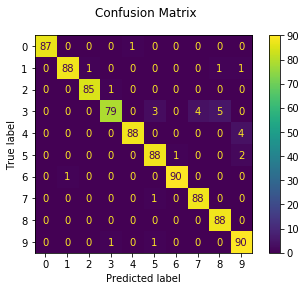

In [25]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.


# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
#print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100]}

# instantiate a model 
svc_grid_search = svm.SVC(kernel="linear")

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')

# fit
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(kernel='linear'), param_grid={'C': [1, 10, 100]},
             scoring='accuracy')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015169,0.001943,0.003985,0.000631,1,{'C': 1},0.933333,0.972222,0.872222,0.955307,0.927374,0.932092,0.033934,1
1,0.012964,0.000894,0.003786,0.000396,10,{'C': 10},0.933333,0.972222,0.872222,0.955307,0.927374,0.932092,0.033934,1
2,0.012873,0.000497,0.003596,0.000493,100,{'C': 100},0.933333,0.972222,0.872222,0.955307,0.927374,0.932092,0.033934,1
